**버블 정렬**은 이웃한 두 원소의 대소 관계를 비교하여 필요에 따라 교환을 반복하는 알고리즘으로, 단순 교환 정렬이라고도 합니다.

## 버블 정렬 알아보기

- 원소들이 정렬하는 과정에서 일어나는 비교, 교환 과정을 패스(pass)라고 합니다.

### 버블 정렬 프로그램

In [6]:
# 버블 정렬 알고리즘 구현하기

from typing import MutableSequence

def bubble_sort(a: MutableSequence) -> None:
    """버블 정렬"""
    n = len(a)
    for i in range(n - 1):
        for j in range(n - 1, i, -1):
            if a[j - 1] > a[j]:
                a[j - 1], a[j] = a[j], a[j - 1]
                
if __name__ == '__main__':
    print('버블 정렬을 수행합니다.')
    num = int(input('원소 소를 입력하세요.: '))
    x = [None] * num  # 원소 수가 num인 배열을 생성
    
    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))
        
    bubble_sort(x)     # 배열 x를 버블 정렬
    
    print('오름차순으로 정렬했습니다.')
    for i in range(num):
        print(f'x[{i}] = {x[i]}')

버블 정렬을 수행합니다.
원소 소를 입력하세요.: 6
x[0]: 2
x[1]: 6
x[2]: 7
x[3]: 2
x[4]: 1
x[5]: 6
오름차순으로 정렬했습니다.
x[0] = 1
x[1] = 2
x[2] = 2
x[3] = 6
x[4] = 6
x[5] = 7


- 서로 이웃한 원소만 교환하므로 안정적입니다.
- 원소를 비교하는 횟수의 합계는 다음과 같습니다.

$ (n - 1) + (n - 2) + \cdots + 1 = n(n - 1) ~ / ~ 2 $

그런데 실제 원소를 교환하는 횟수는 배열의 원솟값에 따라 영향을 받으므로 그 평균값은 비교 횟수 전체의 절반인 n(n - 1) / 4번입니다.

### 교환 과정 출력

In [12]:
# 버블 정렬 알고리즘 구현하기(정렬 과정을 출력)

from typing import MutableSequence

def bubble_sort_verbose(a: MutableSequence) -> None:
    """버블 정렬(정렬 과정을 출력)"""
    ccnt = 0  # 비교 횟수
    scnt = 0  # 교환 횟수
    n = len(a)
    for i in range(n - 1):
        print(f'패스 {i + 1}')
        for j in range(n - 1, i , -1):
            for m in range(0, n - 1):
                print(f'{a[m]:2}' + ('  ' if m != j - 1 else
                                     ' +' if a[j - 1] > a[j] else ' -'),
                                     end='')
            print(f'{a[n - 1]:2}')
            ccnt += 1
            if a[j - 1] > a[j]:
                scnt += 1
                a[j - 1], a[j] = a[j], a[j - 1]
        for m in range(0, n - 1):
            print(f'{a[m]:2}', end='  ')
        print(f'{a[n - 1]:2}')
    print(f'비교를 {ccnt}번 했습니다.')
    print(f'비교를 {scnt}번 했습니다.')
    
if __name__ == '__main__':
    print('버블 정렬을 수행합니다.')
    num = int(input('원소 소를 입력하세요.: '))
    x = [None] * num  # 원소 수가 num인 배열을 생성
    
    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))
        
    bubble_sort_verbose(x)     # 배열 x를 버블 정렬
    
    print('오름차순으로 정렬했습니다.')
    for i in range(num):
        print(f'x[{i}] = {x[i]}')

버블 정렬을 수행합니다.
원소 소를 입력하세요.: 6
x[0]: 2
x[1]: 6
x[2]: 2
x[3]: 61
x[4]: 2
x[5]: 7
패스 1
 2   6   2  61   2 - 7
 2   6   2  61 + 2   7
 2   6   2 - 2  61   7
 2   6 + 2   2  61   7
 2 - 2   6   2  61   7
 2   2   6   2  61   7
패스 2
 2   2   6   2  61 + 7
 2   2   6   2 - 7  61
 2   2   6 + 2   7  61
 2   2 - 2   6   7  61
 2   2   2   6   7  61
패스 3
 2   2   2   6   7 -61
 2   2   2   6 - 7  61
 2   2   2 - 6   7  61
 2   2   2   6   7  61
패스 4
 2   2   2   6   7 -61
 2   2   2   6 - 7  61
 2   2   2   6   7  61
패스 5
 2   2   2   6   7 -61
 2   2   2   6   7  61
비교를 15번 했습니다.
비교를 4번 했습니다.
오름차순으로 정렬했습니다.
x[0] = 2
x[1] = 2
x[2] = 2
x[3] = 6
x[4] = 7
x[5] = 61


### 버블 정렬 알고리즘 개선하기

중단 방식을 적용하여 실행 시간을 단축합니다.

In [9]:
# 버블 정렬 알고리즘 구현하기(알고리즘의 개선 1)

def bubble_sort(a: MutableSequence) -> None:
    """버블 정렬(교환 횟수에 따른 중간)"""
    n = len(a)
    for i in range(n - 1):
        exchng = 0  # 패스에서 교환 횟수
        for j in range(n - 1, i, -1):
            if a[j - 1] > a[j]:
                a[j - 1], a[j] = a[j], a[j - 1]
                exchng += 1
        if exchng == 0:
            break
            
if __name__ == '__main__':
    print('버블 정렬을 수행합니다.')
    num = int(input('원소 소를 입력하세요.: '))
    x = [None] * num  # 원소 수가 num인 배열을 생성
    
    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))
        
    bubble_sort(x)     # 배열 x를 버블 정렬
    
    print('오름차순으로 정렬했습니다.')
    for i in range(num):
        print(f'x[{i}] = {x[i]}')

버블 정렬을 수행합니다.
원소 소를 입력하세요.: 6
x[0]: 1
x[1]: 4
x[2]: 6
x[3]: 2
x[4]: 4
x[5]: 8
오름차순으로 정렬했습니다.
x[0] = 1
x[1] = 2
x[2] = 4
x[3] = 4
x[4] = 6
x[5] = 8


In [14]:
# 버블 정렬 알고리즘 구현하기(알고리즘의 개선 2)

def bubble_sort(a: MutableSequence) -> None:
    """버블 정렬(스캔 범위를 제한)"""
    n = len(a)
    k = 0
    while k < n - 1:
        last = n - 1
        for j in range(n - 1, k, -1):
            if a[j - 1] > a[j]:
                a[j - 1], a[j] = a[j], a[j - 1]
                last = j
        k = last
            
if __name__ == '__main__':
    print('버블 정렬을 수행합니다.')
    num = int(input('원소 소를 입력하세요.: '))
    x = [None] * num  # 원소 수가 num인 배열을 생성
    
    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))
        
    bubble_sort(x)     # 배열 x를 버블 정렬
    
    print('오름차순으로 정렬했습니다.')
    for i in range(num):
        print(f'x[{i}] = {x[i]}')

버블 정렬을 수행합니다.
원소 소를 입력하세요.: 6
x[0]: 5
x[1]: 2
x[2]: 7
x[3]: 3
x[4]: 8
x[5]: 9
오름차순으로 정렬했습니다.
x[0] = 2
x[1] = 3
x[2] = 5
x[3] = 7
x[4] = 8
x[5] = 9


- 실행 결과 비교

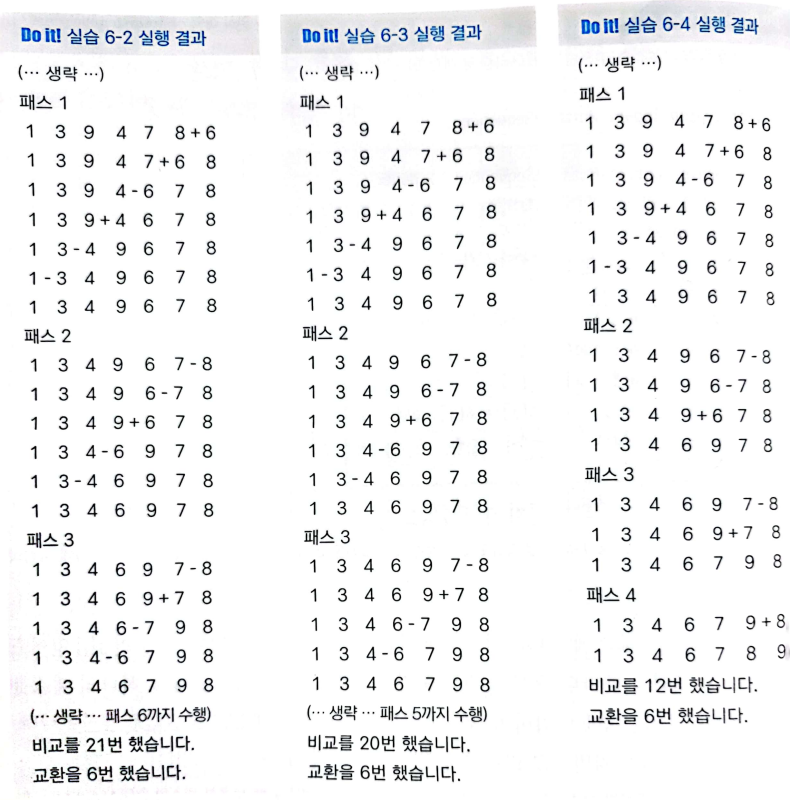

## 쉐이커 정렬

스캔 방향을 번갈아 바꾸어가며 정렬하는 방식이며, 셰이커 정렬(shaker sort)이라고 하며, 양방향 버블 정렬(bidirectional bubble sort),
칵테일 정렬(cocktail sort), 칵테일 셰이커 정렬(cocktail shaker sort)이라고 합니다.

In [16]:
# 셰이커 정렬 알고리즘 구현하기

from typing import MutableSequence

def shaker_sort_verbose(a: MutableSequence) -> None:
    """"셰이커 정렬(정렬 과정을 출력)"""
    ccnt = 0  # 비교 횟수
    scnt = 0  # 교환 횟수
    left = 0
    n = len(a)
    right = len(a) - 1
    last = right
    i = 0
    while left < right:
        print(f'패스{i + 1}')
        i += 1
        for j in range(right, left, -1):
            for m in range(0, n - 1):
                print(f'{a[m]:2}' + ('  ' if m != j - 1 else
                                    ' +' if a[j - 1] > a[j] else ' -'),
                     end='')
            print(f'{a[n - 1]:2}')
            ccnt += 1
            if a[j - 1] > a[j]:
                scnt += 1
                a[j - 1], a[j] = a[j], a[j - 1]
                last = j
        left = last
        for m in range(0, n - 1):
            print(f'{a[m]:2}', end='  ')
        print(f'{a[n - 1]:2}')

        if (left == right):
             break
        print(f'패스 {i + 1}')
        i += 1
        for j in range(left, right):
            for m in range(0, n - 1):
                print(f'{a[m]:2}' + ('  ' if m != j else
                                    ' +' if a[j] > a[j + 1] else ' -'),
                     end='')
            print(f'{a[n - 1]:2}')
            ccnt += 1
            if a[j] > a[j + 1]:
                scnt += 1
                a[j], a[j + 1] = a[j + 1], a[j]
                last = j
        right = last
        for m in range(0, n - 1):
            print(f'{a[m]:2}', end='  ')
        print(f'{a[n - 1]:2}')
    print(f'비교를 {ccnt}번 했습니다.')
    print(f'교환을 {scnt}번 했습니다.')

if __name__ == '__main__':
    print('셰이커 정렬을 수행합니다.')
    num = int(input('원소 수를 입력하세요.: '))
    x = [None] * num  # 원소 수 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f'x[{i}] : '))

    shaker_sort_verbose(x)  # 배열 x를 단순 교환 정렬

    print('오름차순으로 정렬했습니다.')
    for i in range(num):
        print(f'x[{i}] = {x[i]}')

셰이커 정렬을 수행합니다.
원소 수를 입력하세요.: 6
x[0] : 9
x[1] : 1
x[2] : 2
x[3] : 3
x[4] : 4
x[5] : 5
패스1
 9   1   2   3   4 - 5
 9   1   2   3 - 4   5
 9   1   2 - 3   4   5
 9   1 - 2   3   4   5
 9 + 1   2   3   4   5
 1   9   2   3   4   5
패스 2
 1   9 + 2   3   4   5
 1   2   9 + 3   4   5
 1   2   3   9 + 4   5
 1   2   3   4   9 + 5
 1   2   3   4   5   9
패스3
 1   2   3   4 - 5   9
 1   2   3 - 4   5   9
 1   2 - 3   4   5   9
 1   2   3   4   5   9
비교를 12번 했습니다.
교환을 5번 했습니다.
오름차순으로 정렬했습니다.
x[0] = 1
x[1] = 2
x[2] = 3
x[3] = 4
x[4] = 5
x[5] = 9


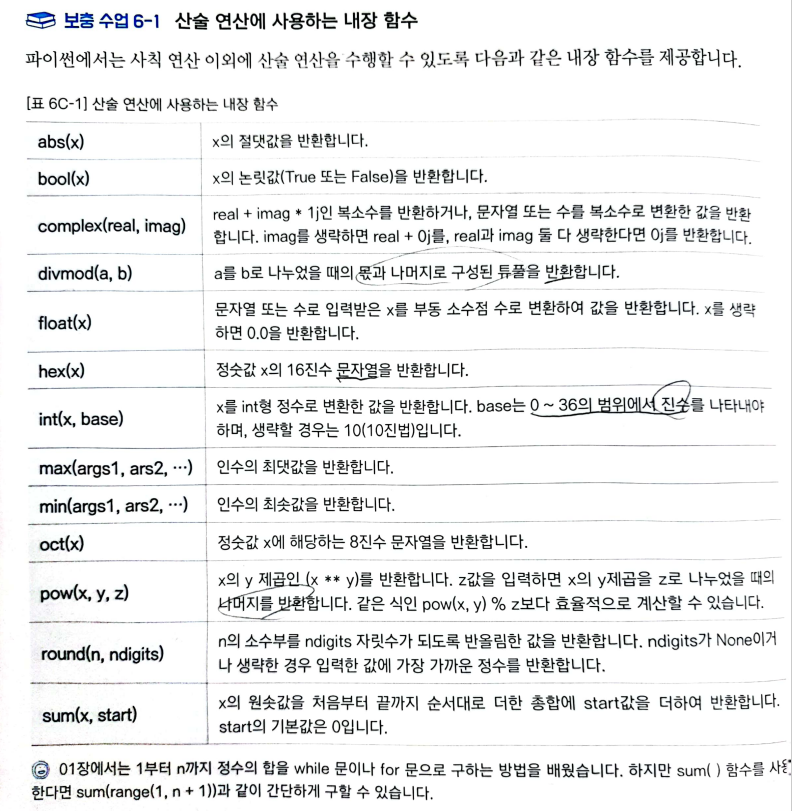